<a href="https://colab.research.google.com/github/louis-sanna-eki/graph-generation/blob/master/notebooks/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this notebook we keep track of all valid examples.

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install pandas

### CO2 linechart

Bonjour Louis, désolé pour ma faible réactivité, on avait beaucoup de dossiers sur le feu. Suite à notre discussion de l'autre jour, et pour entamer une première collaboration sur un premier graphique, je t'envoie une base de données sur les émissions de CO² (Our World in Data). Pourrais-tu à partir de ces données, produire un graphique assez simple qui représente l'évolution des émissions de CO² depuis 1950 comparant l'Union Européenne, l'Amérique du Nord, la Chine, l'Afrique, l'Amérique du Sud ?

In [4]:
PATH_TO_CO2_FILE = '/content/drive/My Drive/lr-data/graph-generation/owd-co2.csv'

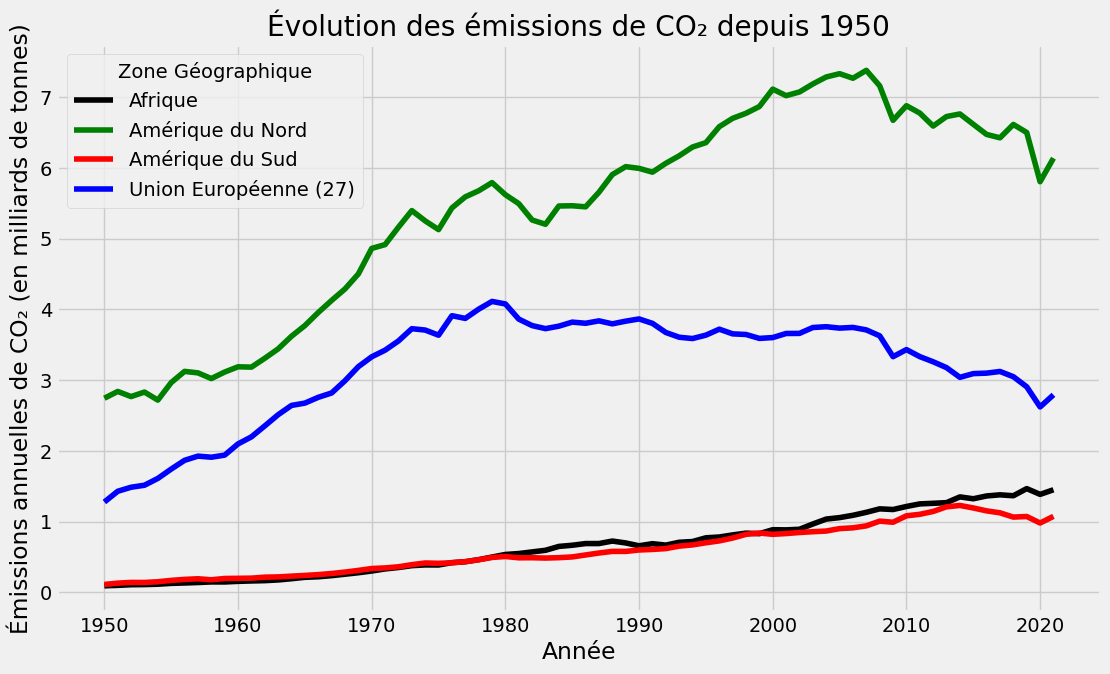

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply the FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Define specific colors for each continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Translation dictionary for entity names
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Sort entities by French alphabetical order
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Create the plot
plt.figure(figsize=(12, 7))
for entity in sorted_entities:
    translated_entity = entity_translations[entity]
    plt.plot(grouped_data.index, grouped_data[entity]/1e9, label=translated_entity, color=colors[entity])

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en milliards de tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Zone Géographique')

# Show the plot
plt.show()